In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da

import os

In [15]:
name = 'DUSP1_Dex_10min_20220224'
h5_location = os.path.join(os.path.dirname(os.getcwd()), 'dataBases')
h5_location = os.path.join(h5_location, name, name + '.h5' )

h5_file = h5py.File(h5_location, 'r') # making this read is important otherwise you may get WINERROR 33


In [16]:
level = 1

def print_group(name, obj):
    # Calculate current level based on the name depth
    current_level = name.count('/')
    if current_level <= level:
        print("  " * 2 * current_level + f"- {name}")

h5_file.visititems(print_group)

- Analysis_demo_2024-12-04
    - Analysis_demo_2024-12-04/bigfish_threshold
    - Analysis_demo_2024-12-04/parameters
- Analysis_demo_2024-12-05
    - Analysis_demo_2024-12-05/bigfish_threshold
    - Analysis_demo_2024-12-05/parameters
- masks
- metadata
- raw_images


In [ ]:
pd.read_hdf(h5_location, key='Analysis_demo_2024-12-05/bigfish_threshold')

TypeError: cannot create a storer if the object is not existing nor a value are passed

In [ ]:
spots = pd.read_hdf(h5_location, key='Analysis_demo_2024-11-20/df_spotresults')
spots

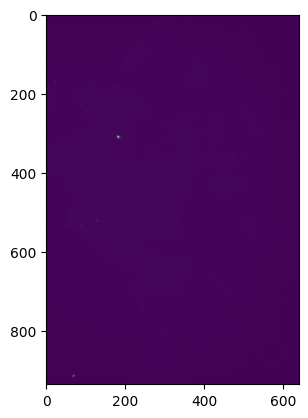

NameError: name 'spots' is not defined

In [ ]:
# TODO For undergrad project spot classification 

# load in image
d = h5_file['raw_images']
# p, t, c, z, y, x
images = da.from_array(d, (1,1,-1,-1,-1,-1))

# display plot
plt.imshow(np.max(images[0, 0, 0, :, :, :], axis=0))
plt.show()

x, y, z = spots.iloc[6][['x_px', 'y_px', 'z_px']]


plt.imshow(np.max(images[0, 0, 0, :, y-2:y+3, x-2:x+3], axis=0))
plt.show()



(30, 1, 3, 1, 936, 640)


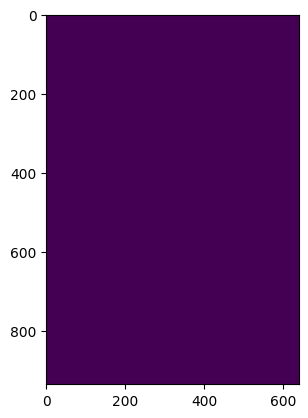

array([0.], dtype=float32)

In [22]:
# TODO For undergrad project spot classification 

# load in image
d = h5_file['masks']
# p, t, c, z, y, x
masks = da.from_array(d, (1,1,-1,-1,-1,-1))
print(masks.shape)

# display plot
plt.imshow(np.max(masks[0, 0, 1, :, :, :], axis=0))
plt.show()

np.unique(masks[0, 0, 2, :, :, :].flatten().compute())